# File operations on AWS S3 with Python

There are several ways to access files on Amazon Web Services S3 where the FlyLight imagery, color depth MIPs, and templates are stored. A simple way is to use the [boto3](https://boto3.amazonaws.com/v1/documentation/api/latest/index.html) library:

In [36]:
import boto3

S3 stores files (called *objects*) in *buckets*. With boto3, it's easy to access an S3 bucket:

In [37]:
S3_RESOURCE = boto3.resource('s3')
bucket = S3_RESOURCE.Bucket("janelia-flylight-templates")

The resource we're creating above uses a high level API that gives us access to Amazon Web Services. Using the resource, we create a bucket object.

## Listing the contents of a bucket

In [38]:
for obj in bucket.objects.all():
    print(obj.key)

JRC2018_FEMALE_20x_HR/
JRC2018_FEMALE_20x_HR/JRC2018_FEMALE_20x_HR.nrrd
JRC2018_FEMALE_20x_gen1/
JRC2018_FEMALE_20x_gen1/JRC2018_FEMALE_20x_gen1.nrrd
JRC2018_FEMALE_63x_DS/
JRC2018_FEMALE_63x_DS/JRC2018_FEMALE_38um_iso.nrrd
JRC2018_FEMALE_VNC_63x/
JRC2018_FEMALE_VNC_63x/JRC2018_VNC_FEMALE_63x.nrrd
JRC2018_MALE_20x_HR/
JRC2018_MALE_20x_HR/JRC2018_MALE_20xHR.nrrd
JRC2018_MALE_63x_DS/
JRC2018_MALE_63x_DS/JRC2018_MALE_38um_iso.nrrd
JRC2018_Unisex_20x_HR/
JRC2018_Unisex_20x_HR/JRC2018_UNISEX_20x_HR.nrrd
JRC2018_Unisex_VNC_63x/
JRC2018_Unisex_VNC_63x/JRC2018_VNC_UNISEX_63x.nrrd
JRC2018_VNC_FEMALE/
JRC2018_VNC_FEMALE/JRC2018_VNC_FEMALE_461.nrrd
JRC2018_VNC_MALE/
JRC2018_VNC_MALE/JRC2018_VNC_MALE_461.nrrd
JRC2018_VNC_Unisex/
JRC2018_VNC_Unisex/JRC2018_VNC_UNISEX_461.nrrd
README.md


In the listing, you'll see what looks like folders or directories, and then files in those directories. Although S3 will show objects in a bucket with directories, there actually are none - storage in a bucket is flat, rather than heirarcical (more information [here](https://docs.aws.amazon.com/AmazonS3/latest/user-guide/using-folders.html)).

## Accessing individual files

Let's look at one of the objects from the FlyLight_Gen1_GAL4 color depth MIP collection - a thumbnail of the original image. Objects are referred to with *keys*:

In [39]:
bucket = S3_RESOURCE.Bucket("janelia-flylight-color-depth-thumbnails")
KEY = "JRC2018_Unisex_20x_HR/FlyLight_Gen1_GAL4/R10A01-20080306_00_fA01b_20080311004901281-GAL4-f-20x-brain-JRC2018_Unisex_20x_HR-CDM_1.jpg"
obj = bucket.Object(KEY)
print(obj)

s3.Object(bucket_name='janelia-flylight-color-depth-thumbnails', key='JRC2018_Unisex_20x_HR/FlyLight_Gen1_GAL4/R10A01-20080306_00_fA01b_20080311004901281-GAL4-f-20x-brain-JRC2018_Unisex_20x_HR-CDM_1.jpg')


As you can see above, the object (an [S3 Object](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#S3.Object)) stores the bucket name and key. Let's get a few attributes:

In [40]:
print("File type is %s and the size is %d bytes" % (obj.content_type, obj.content_length))

File type is image/jpeg and the size is 15581 bytes


## Downloading a file

We can easily download a file from a bucket using the [download_file](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#S3.Bucket.download_file) method:

In [41]:
bucket.download_file(KEY, '/tmp/demo_file.jpg')

The image was downloaded to */tmp/demo_file.png*. Let's display it:

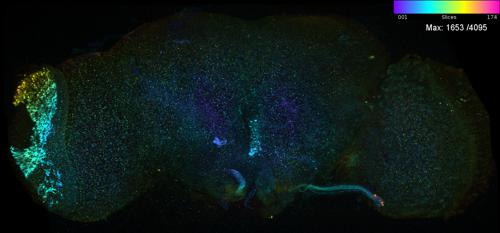

In [42]:
from IPython.display import Image
Image(filename='/tmp/demo_file.jpg')